In [1]:
# For numeric calculations
import numpy as np
import pandas as pd

# For visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# For balancing the dataset
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing training data
train_dataset_path = "./dataset/exoTrain.csv"
train_df = pd.read_csv(train_dataset_path)

X = train_df.drop(["LABEL"], axis=1)
y = train_df["LABEL"]

In [3]:
# Looking into first 15 observations of the train_df
train_df.tail(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5077,1,125.57,78.69,98.29,91.16,78.42,45.82,61.69,22.73,39.09,...,32.35,63.23,57.98,90.43,115.12,210.09,3.80,16.33,27.35,21.30
5078,1,7.45,10.02,6.87,-2.82,-1.56,-4.30,-7.01,-6.97,-2.54,...,-5.25,-8.56,0.53,-4.29,-6.60,8.75,-10.69,-9.54,-2.48,-8.69
5079,1,475.61,395.50,423.61,376.36,338.94,321.26,326.34,342.84,251.23,...,543.25,453.87,344.35,266.16,242.18,163.02,86.29,13.06,161.22,213.60
5080,1,-46.63,-55.39,-64.88,-88.75,-75.40,-64.06,-66.37,-41.95,-68.07,...,29.64,6.90,32.94,56.63,28.71,28.82,-20.12,-14.41,-43.35,-30.04
5081,1,299.41,302.77,278.68,263.48,236.89,186.93,145.45,151.20,123.38,...,-126.36,-133.82,-134.02,-98.76,-106.60,-74.95,-46.29,-3.08,-28.43,-48.68
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55
5086,1,323.28,306.36,293.16,287.67,249.89,218.30,188.86,178.93,118.93,...,71.19,0.97,55.20,-1.63,-5.50,-25.33,-41.31,-16.72,-14.09,27.82


In [5]:
print(f'Train dataset consists of {train_df.shape[0]} rows and {train_df.shape[1]} columns')

Train dataset consists of 5087 rows and 3198 columns


## Class distribution

In [6]:
y.value_counts()

LABEL
1    5050
2      37
Name: count, dtype: int64

<Axes: ylabel='count'>

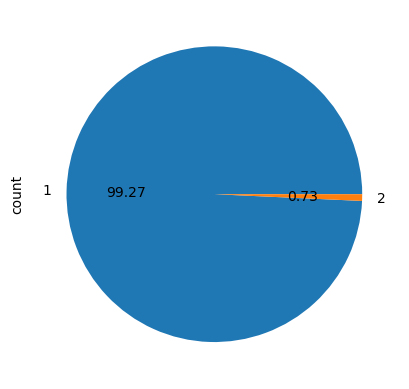

In [7]:
y.value_counts().plot.pie(autopct = "%.2f")

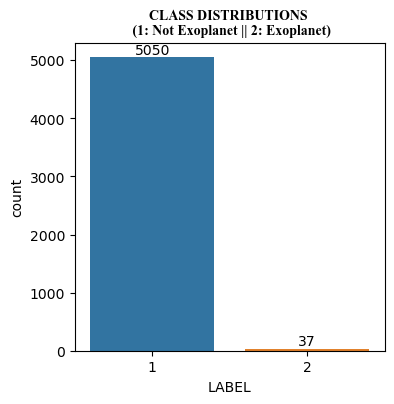

In [8]:
# Visualization - Number of Stars with Confirmed Exoplanets or Not
plt.figure(figsize = (4,4))
plt.title('CLASS DISTRIBUTIONS \n (1: Not Exoplanet || 2: Exoplanet)', fontsize=20, font='times new roman', weight='bold', color='black')
ax = sns.countplot(data = train_df, x = 'LABEL')
ax.bar_label(ax.containers[0])
plt.show()

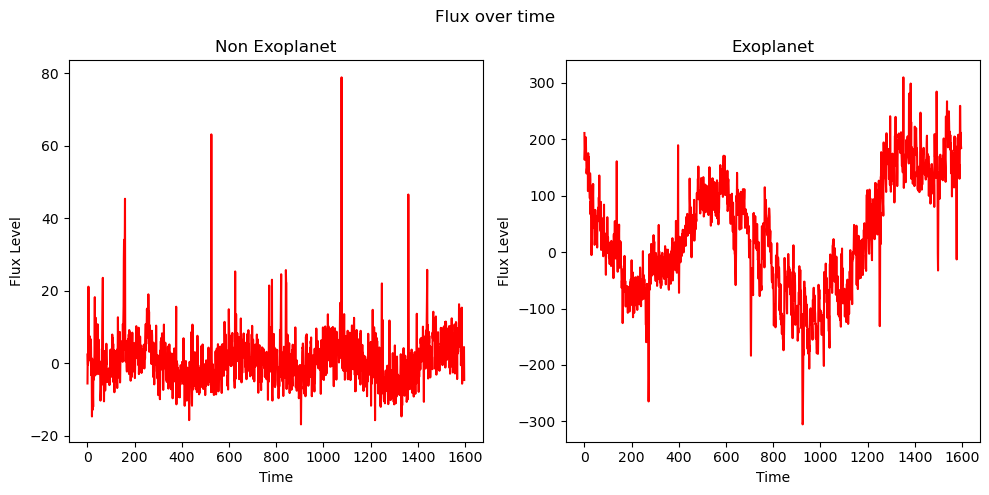

In [9]:
# Setting figure size
plt.figure(figsize=(10, 5))

# Non-exoplanet star light flux visualization over time
row_index = 150 # Selecting random non-exoplanet row
fluxes_non_exo = train_df.iloc[row_index,1:(train_df.shape[1]//2)].values

plt.subplot(1, 2, 1)
plt.plot(fluxes_non_exo, color = "red")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Non Exoplanet")

# Exoplanet star light flux visualization over time
row_index = 5 # Selecting random exoplanet row
fluxes_exo = train_df.iloc[row_index,1:(train_df.shape[1]//2)].values

plt.subplot(1, 2, 2)
plt.plot(fluxes_exo, color = "red")
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title("Exoplanet")

plt.tight_layout()
plt.suptitle('Flux over time') 
plt.subplots_adjust(top=0.88)
plt.show()

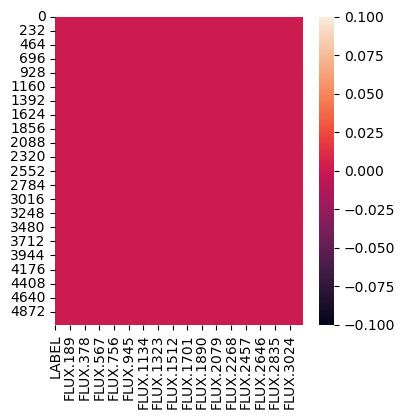

In [10]:
plt.figure(figsize = (4,4))
sns.heatmap(train_df.isnull())
plt.show()

In [38]:
# Over sampling the imbalanced class
smote = SMOTE(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X, y)

<Axes: ylabel='count'>

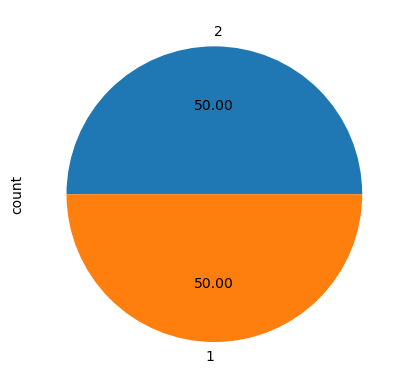

In [39]:
y_res.value_counts().plot.pie(autopct = "%.2f")